# Mecánica Celeste: teoría, algoritmos y problemas
## Por Jorge I. Zuluaga

### Código reciclado

In [1]:
import pymcel as pc
%load_ext autoreload 
%autoreload 2

Paquete pymcel cargado. Versión: 0.6.4


In [2]:
import numpy as np
from matplotlib import patches
def dibuja_esfera(ax, centro=(0,0,0), radio=1, **kwargs):
    """Dibuja una esfera en un axis en 3d

    Ejemplo:
        # Esfera en 3d 
        import matplotlib.pyplot as plt
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        dibuja_esfera(ax, centro=(1,1,0), radio=0.2, color='b', alpha=0.5)
        ax.axis('equal');
    
        # Esfera en 2d
        import matplotlib.pyplot as plt
        fig = plt.figure()
        ax = fig.add_subplot(111)
        dibuja_esfera(ax, centro=(1,1), radio=0.2, color='b', alpha=0.5)
        ax.axis('equal');

    Notas:
        Adaptado de: https://stackoverflow.com/q/31768031
    """
    if ax.name != '3d':
        s = patches.Circle(centro[:2], radius=radio, fill=True, **kwargs)
        ax.add_patch(s)
    else:
        phi, theta = np.mgrid[0.0:np.pi:100j, 0.0:2.0*np.pi:100j]
        x = centro[0] + radio*np.sin(phi)*np.cos(theta)
        y = centro[1] + radio*np.sin(phi)*np.sin(theta)
        z = centro[2] + radio*np.cos(phi)
        s = ax.plot_surface(x, y, z, **kwargs)

    return s

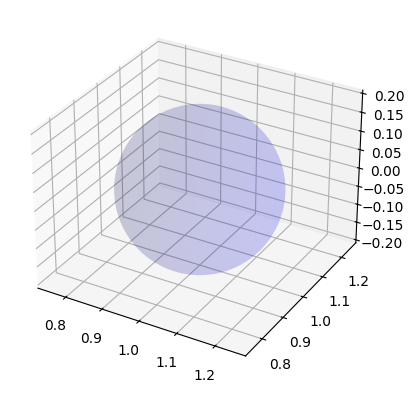

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
dibuja_esfera(ax, centro=(1,1,0), radio=0.2, color='b', alpha=0.1)
ax.axis('equal');

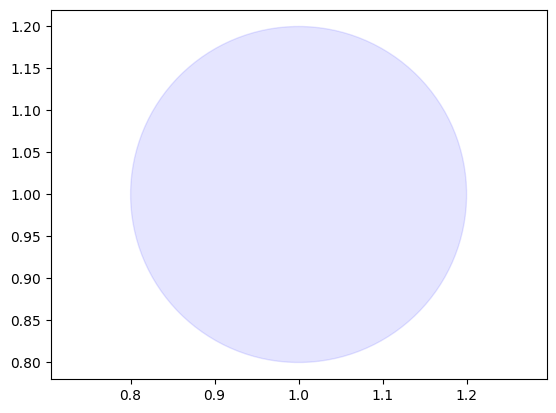

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
dibuja_esfera(ax, centro=(1,1), radio=0.2, color='b', alpha=0.1)
ax.axis('equal');

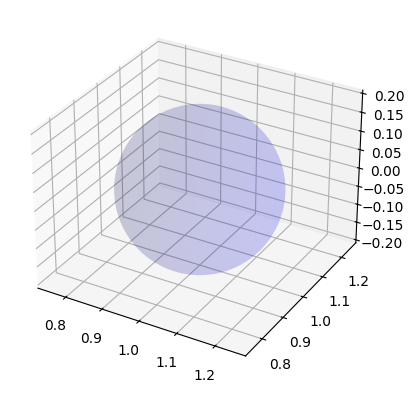

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
pc.dibuja_esfera(ax, centro=(1,1,0), radio=0.2, color='b', alpha=0.1)
ax.axis('equal');

In [31]:
datos='elements'
#datos='vectors'
#datos='ephemerides'
#propiedades=[('a','km'),('incl','deg')]
#propiedades = 'elementos'

id = '399'
location = '@0'

epochs = '2024-01-01 12:00:00'
#epochs = ['2024-01-01 12:00:00','2024-01-02 12:00:00']
#epochs = dict(start='2024-01-01 12:00:00', stop='2024-01-02 12:00:00',step='1d')
#epochs = np.linspace(1000,2000)

tabla, ts, salida = pc.consulta_horizons(id=id,location=location,epochs=epochs,datos=datos)
ap, ep, Ip, Wp, wp, fpo, Mpo, Pp, npl, tpo = salida
salida

Paquete pymcel cargado. Versión: 0.5.12


array([1.48832693e+11, 1.50938090e-02, 9.34788325e-03, 2.42824159e+01,
       4.58485093e+01, 3.05763213e+01, 2.97049970e+01, 3.62216803e+02,
       9.93879900e-01, 2.46028111e+06])

In [28]:
import numpy as np

In [30]:
ap**3*npl**2 

1.3288932302247907e+20

In [16]:
0.999*np.pi/180/86400

2.0180369476184436e-07

In [8]:
tabla

<Table masked=True length=2>
 targetname datetime_jd ...         Q                 P        
    ---          d      ...         AU                d        
   str11      float64   ...      float64           float64     
----------- ----------- ... ----------------- -----------------
Earth (399)   2460311.0 ... 1.009901711695667 362.2168031990878
Earth (399)   2460312.0 ... 1.010820843921332 362.4703323109576

## Extraer elementos orbitales a partir de TLE

In [10]:
%%file TLE.txt
1 25544U 98067A   24099.53683544  .00012151  00000-0  22046-3 0  9999
2 25544  51.6372 300.7415 0004643  48.1251 312.0133 15.50008163447742

Paquete pymcel cargado. Versión: 0.5.11
Writing TLE.txt


In [16]:
!pip install -Uq sgp4

In [21]:
import numpy as np
from sgp4.io import twoline2rv 
from sgp4.earth_gravity import wgs84

In [22]:
with open('TLE.txt', 'r') as f:
    lines=f.readlines()

In [24]:
for i in range(0,len(lines),2):
    line1=lines[i].strip()
    line2=lines[i+1].strip()

    satellite=twoline2rv(line1,line2,wgs84)

In [45]:
satellite.__dict__

{'error': 0,
 'satnum_str': '25544',
 'classification': 'U',
 'intldesg': '98067A',
 'epochdays': 99.53683544,
 'ndot': 3.681856899476232e-10,
 'nddot': 0.0,
 'bstar': 0.00022046,
 'ephtype': '0',
 'elnum': 999,
 'inclo': 0.901239156510816,
 'nodeo': 5.2489293723865265,
 'ecco': 0.0004643,
 'argpo': 0.8399414478515231,
 'mo': 5.445659395012823,
 'no_kozai': 0.06763186469284738,
 'revnum': '44774',
 'epochyr': 2024,
 'jdsatepoch': 2460409.03683544,
 'epoch': datetime.datetime(2024, 4, 8, 12, 53, 2, 582015),
 'isimp': 0,
 'method': 'n',
 'aycof': 0.0009169580441304157,
 'con41': 0.15557765938123258,
 'cc1': 3.768265044507342e-09,
 'cc4': 9.402973133265443e-07,
 'cc5': 0.000501102491032535,
 'd2': 1.1378625115444716e-15,
 'd3': 5.139529213209656e-22,
 'd4': 2.7067037240210757e-28,
 'delmo': 1.0187927589921124,
 'eta': 0.00930134167763992,
 'argpdot': 4.4712261440343036e-05,
 'omgcof': 3.474301166002464e-07,
 'sinmao': -0.7429894809787141,
 't': 0.0,
 't2cof': 5.652397566761014e-09,
 't3co

In [27]:
satellite.radiusearthkm*satellite.alta

420.36185323781416

In [36]:
satellite.radiusearthkm*satellite.am*(1+satellite.ecco)-satellite.radiusearthkm, satellite.radiusearthkm*satellite.alta

(420.361853237815, 420.36185323781416)

In [ ]:
def read_convert_TLE(self, tle_file):
    # Read TLE text file from object
    sv_final=np.empty((0,8))
    #tle_file=f"tle_Envisat.txt"
    #lines=[]
    with open(tle_file, 'r') as f:
        lines=f.readlines()
    for i in range(0,len(lines),2):
        line1=lines[i].strip()
        line2=lines[i+1].strip()
        satellite=twoline2rv(line1,line2,wgs84)
        epoch=satellite.epoch
        year=epoch.year
        month=epoch.month
        day=epoch.day
        hours=epoch.hour
        minutes=epoch.minute
        seconds=epoch.second+round(epoch.microsecond/1e6,3)
        position,velocity=satellite.propagate(year, month, day, hours, minutes, seconds)
        jday=367*year-mt.trunc(((7*(year+mt.trunc((month+9)/12)))/4))+mt.trunc(275*month/9)+day+1721013.5
        poday=(((((seconds/60)+minutes)/60)+hours)/24)
        utc_mdj=(jday-2430000.0)+poday # Modified Julian Date TT in GMAT
        utc_gmat=epoch.strftime('%d %b %Y %H:%M:%S.%f')[:-3] # string use .%f for more precision and [:-3] for 3 digit
        sv=np.array(position+velocity)#+sec_epoch)
        sv_sec_sv=np.append(utc_mdj,sv)#.astype(object)) # it was sec_epoch
        sv_utc_sec_sv=np.append(utc_gmat,sv_sec_sv.astype(object))
        sv_final=np.append(sv_final,sv_utc_sec_sv)

In [38]:
!pip install -Uq geopandas

In [41]:
# https://geopandas.org/en/stable/docs/user_guide/io.html
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import sys
import pandas as pd

import requests
import plotly.graph_objects as go

def plot_back(fig):
    """back half of sphere"""
    clor=f'rgb(220, 220, 220)'
    R = np.sqrt(6368.134)
    u_angle = np.linspace(0, np.pi, 25)
    v_angle = np.linspace(0, np.pi, 25)
    x_dir = np.outer(R*np.cos(u_angle), R*np.sin(v_angle))
    y_dir = np.outer(R*np.sin(u_angle), R*np.sin(v_angle))
    z_dir = np.outer(R*np.ones(u_angle.shape[0]), R*np.cos(v_angle))
    fig.add_surface(z=z_dir, x=x_dir, y=y_dir, colorscale=[[0, clor], [1, clor]], opacity=1.0, showlegend=False, lighting=dict(diffuse=0.1)) # opacity=fig.sphere_alpha, colorscale=[[0, fig.sphere_color], [1, fig.sphere_color]])


def plot_front(fig):
    """front half of sphere"""
    clor=f'rgb(220, 220, 220)'
    R = np.sqrt(6368.134)
    u_angle = np.linspace(-np.pi, 0, 25)
    v_angle = np.linspace(0, np.pi, 25)
    x_dir = np.outer(R*np.cos(u_angle), R*np.sin(v_angle))
    y_dir = np.outer(R*np.sin(u_angle), R*np.sin(v_angle))
    z_dir = np.outer(R*np.ones(u_angle.shape[0]), R*np.cos(v_angle))
    fig.add_surface(z=z_dir, x=x_dir, y=y_dir, colorscale=[[0, clor], [1, clor]], opacity=1.0, showlegend=False, lighting=dict(diffuse=0.1)) # opacity=fig.sphere_alpha, colorscale=[[0, fig.sphere_color], [1, fig.sphere_color]])
        

def plot_polygon(poly):
    
    xy_coords = poly.exterior.coords.xy
    lon = np.array(xy_coords[0])
    lat = np.array(xy_coords[1])
    
    lon = lon * np.pi/180
    lat = lat * np.pi/180
    
    R = 6378.134
    x = R * np.cos(lat) * np.cos(lon)
    y = R * np.cos(lat) * np.sin(lon)
    z = R * np.sin(lat)
    
    return x, y, z

def plot_orbit() :
    angle = np.linspace(0, 2.0*np.pi, 144)
    R = 6878.134
    x = R*np.cos(angle)
    y = R*np.sin(angle)
    z = np.zeros(144)
    
    return x, y, z

# Read the shapefile.  Creates a DataFrame object
gdf = gpd.read_file("ne_110m_admin_0_countries.shp")
fig = go.Figure()
plot_front(fig)
plot_back(fig)

marker = dict(color=[f'rgb({np.random.randint(0,256)}, {np.random.randint(0,256)}, {np.random.randint(0,256)})' for _ in range(25)],
           size=10)

for i in gdf.index :
    # print(gdf.loc[i].NAME)            # Call a specific attribute
    
    polys = gdf.loc[i].geometry         # Polygons or MultiPolygons 
    
    if polys.geom_type == 'Polygon':
        x, y, z = plot_polygon(polys)
        fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(color=f'rgb(0, 0,0)'), showlegend=False) ) 
        
    elif polys.geom_type == 'MultiPolygon':
        
        for poly in polys.geoms:
            x, y, z = plot_polygon(poly)
            fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(color=f'rgb(0, 0,0)'), showlegend=False) ) 
            

# Helix equation
x, y, z = plot_orbit()

fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(color=f'rgb(255, 0,0)'), showlegend=False ) ) 
            
fig.write_html("3d_plot.html")
fig.show()

In [12]:
pc.constantes.au

149597870700.0

In [14]:
pc.constantes.día

86400

In [15]:
pc.constantes.lista

Paquete pymcel cargado. Versión: 0.5.3


['G',
 'N_A',
 'R',
 'Ryd',
 'a0',
 'alpha',
 'atm',
 'b_wien',
 'c',
 'e',
 'eps0',
 'g0',
 'h',
 'hbar',
 'k_B',
 'm_e',
 'm_n',
 'm_p',
 'mu0',
 'muB',
 'sigma_T',
 'sigma_sb',
 'u',
 'GM_earth',
 'GM_jup',
 'GM_sun',
 'L_bol0',
 'L_sun',
 'M_earth',
 'M_jup',
 'M_sun',
 'R_earth',
 'R_jup',
 'R_sun',
 'au',
 'kpc',
 'pc',
 'año',
 'día']

In [12]:
#Número de partículas
N=3
#Parámetros gravitacionales o masas de las partúclas
mus=[1.0,0.2,0.5]
#Estado inicial del sistema
Y0s=[
    #Posición cuerpo 0
    0,0,0,
    #Posición cuerpo 1
    1,0,0,
    #Posición cuerpo 2
    -1,0,0,
    #Velocidad cuerpo 0
    0,0,0,
    #Velocidad cuerpo 1
    0,1,0,
    #Velocidad cuerpo 2
    0,-1,0,
  ]


In [13]:
from scipy.integrate import odeint
solucion=odeint(pc.edm_ncuerpos,Y0s,[0.0,1.0],args=(3,mus))
solucion

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -1.        ,  0.        ],
       [-0.15068697, -0.06168292,  0.        ,  0.49242022,  0.83105115,
         0.        , -0.49559416, -0.80905462,  0.        , -0.29283302,
        -0.20870151,  0.        , -0.91545262,  0.52712521,  0.        ,
         0.95184709, -0.39344707,  0.        ]])

In [14]:
from scipy.integrate import odeint
solucion=odeint(pc.edm_ncuerpos_eficiente,Y0s,[0.0,1.0],args=(3,mus))
solucion

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        , -1.        ,  0.        ],
       [-0.15068697, -0.06168292,  0.        ,  0.49242022,  0.83105115,
         0.        , -0.49559416, -0.80905462,  0.        , -0.29283302,
        -0.20870151,  0.        , -0.91545262,  0.52712521,  0.        ,
         0.95184709, -0.39344707,  0.        ]])

In [52]:
#Número de partículas
N=5

#Generación de las condiciones para cada partícula
from numpy.random import uniform,seed
seed(7)

#Condiciones iniciales
sistema=[]
for i in range(N):
    particula=dict(
        m=uniform(0.0,1.0),
        r=uniform(-1.0,1.0,size=3),
        v=uniform(-1.0,1.0,size=3)
    )
    sistema+=[particula]
    
from numpy import linspace
Nt=100
ts=linspace(0.0,10.0,Nt)

Paquete pymcel cargado. Versión: 0.5.8


In [53]:
rs,vs,rps,vps,constantes=pc.ncuerpos_solucion(sistema,ts)

Paquete pymcel cargado. Versión: 0.5.8


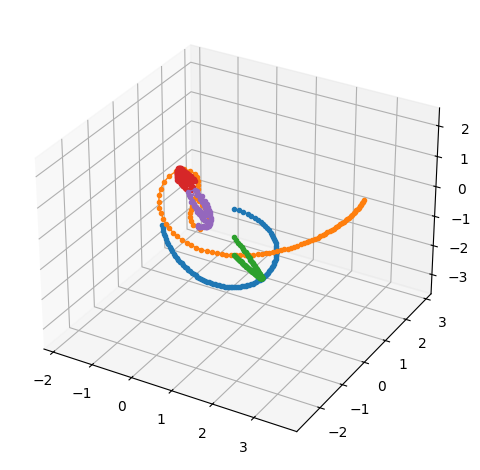

In [55]:
fig=pc.plot_ncuerpos_3d(rps,vps,marker='.')

In [62]:
fig=pc.plot_ncuerpos_3d(rps,vps,tipo='plotly')

Paquete pymcel cargado. Versión: 0.5.8


In [9]:
from pymcel.plot import fija_ejes_proporcionales

In [2]:
import spiceypy as spy

In [3]:
spy.furnsh('pymcel/data/gm_de431.tpc')

In [5]:
n,value = spy.bodvrd('EARTH','GM',1)

In [6]:
value[0]

398600.4354360959

In [11]:
pc.constantes.G

[autoreload of pymcel.constantes failed: Traceback (most recent call last):
  File "/home/jzuluaga/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/jzuluaga/.local/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/usr/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/jzuluaga/pymcel/src/pymcel/constantes.py", line 2, in <module>
    from astropy.constants import G, M_sun, R_sun, L_sun, au, pc, c, h, k_B, m_p, m_e, sigma_sb, e, epsilon_0, mu_0, N_A, R, sigma_T, alpha, a0, m_e, m_p, u, M_earth, R_earth, R_jup, M_jup, M_earth, M_sun, R_sun, L_sun, G, 

1

In [12]:
from astropy.constants import G

In [13]:
G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

In [15]:
from astropy.constants import G, M_sun, R_sun, L_sun, au, pc, c

In [16]:
from astropy import constants

In [18]:
constants.__dict__

{'__name__': 'astropy.constants',
 '__doc__': "\nContains astronomical and physical constants for use in Astropy or other\nplaces.\n\nA typical use case might be::\n\n    >>> from astropy.constants import c, m_e\n    >>> # ... define the mass of something you want the rest energy of as m ...\n    >>> m = m_e\n    >>> E = m * c**2\n    >>> E.to('MeV')  # doctest: +FLOAT_CMP\n    <Quantity 0.510998927603161 MeV>\n\nThe following constants are available:\n\n========== ============== ================ =========================\n   Name        Value            Unit       Description\n========== ============== ================ =========================\n    G        6.6743e-11     m3 / (kg s2)   Gravitational constant\n   N_A     6.02214076e+23    1 / (mol)     Avogadro's number\n    R        8.31446262     J / (K mol)    Gas constant\n   Ryd       10973731.6       1 / (m)      Rydberg constant\n    a0     5.29177211e-11        m         Bohr radius\n  alpha    0.00729735257                  

In [26]:
constantes = "["
for key in constants.__dict__.keys():
    if '__' in key:
        continue
    constantes += f"'{key}', "
constantes += "]"

In [27]:
constantes

"['constant', 'codata2018', 'iau2015', 'config', 'si', 'cgs', 'utils', 'codata', 'iaudata', 'Constant', 'EMConstant', 'G', 'N_A', 'R', 'Ryd', 'a0', 'alpha', 'atm', 'b_wien', 'c', 'e', 'eps0', 'g0', 'h', 'hbar', 'k_B', 'm_e', 'm_n', 'm_p', 'mu0', 'muB', 'sigma_T', 'sigma_sb', 'u', 'GM_earth', 'GM_jup', 'GM_sun', 'L_bol0', 'L_sun', 'M_earth', 'M_jup', 'M_sun', 'R_earth', 'R_jup', 'R_sun', 'au', 'kpc', 'pc', ]"

In [21]:
constantes = ['G', 'M_sun', 'R_sun', 'L_sun', 'au', 'pc', 'c']
exec('from astropy.constants import ' + ', '.join(constantes))
for constante in constantes:
    exec(f"{constante} = {constante}.value")

In [22]:
R_sun

695700000.0

In [31]:
pc.constantes.lista

AttributeError: 'numpy.float64' object has no attribute 'constantes'

In [29]:
pc.constantes

['G', 'N_A', 'R', 'Ryd', 'a0', 'alpha', 'atm', 'b_wien', 'c', 'e', 'eps0', 'g0', 'h', 'hbar', 'k_B', 'm_e', 'm_n', 'm_p', 'mu0', 'muB', 'sigma_T', 'sigma_sb', 'u', 'GM_earth', 'GM_jup', 'GM_sun', 'L_bol0', 'L_sun', 'M_earth', 'M_jup', 'M_sun', 'R_earth', 'R_jup', 'R_sun', 'au', 'kpc', 'pc']
Paquete pymcel cargado. Versión: 0.5.3


AttributeError: 'numpy.float64' object has no attribute 'constantes'

In [30]:
type(pc.constantes)

AttributeError: 'numpy.float64' object has no attribute 'constantes'

In [17]:
pc.constantes.GM_earth

398600400000000.0

In [ ]:
398600.4354360959

In [2]:
import numpy as np

In [21]:
sistema = [
    dict(m=1, r=[0,0,0], v=[0,0,0]),
    dict(m=0.15, r=[1,0,0], v=[0,1.0,0.5]),
]

ts = np.linspace(0,10,300)
rs,vs,rps,vps,cuadraturas = pc.ncuerpos_solucion(sistema,ts)
fig = pc.plot_ncuerpos_3d(rps,vps,tipo='plotly')

In [18]:
pc.encuentra_rangos(rs)

Paquete pymcel cargado. Versión: 0.5.4


([-1.7903309225338715, 2.647068743776474],
 [0.0, 4.437399666310346],
 [-2.180318141379061, 2.2570815249312846])

In [12]:
!pip3 install plotly

Defaulting to user installation because normal site-packages is not writeable


In [14]:
import sys

In [15]:
'plotly' in sys.modules

False

In [16]:
import plotly

In [2]:
def edm_dos_cuerpos(Y,t,mu):
    r = Y[:3]
    v = Y[3:]
    drdt = v
    dvdt = -mu*r/np.linalg.norm(r)**3
    return np.concatenate([drdt,dvdt])

In [38]:
import numpy as np
from scipy.integrate import odeint

In [39]:
X0 = [1,0,0,0,0.7,0.5]
ts = np.linspace(0,10,300)
solucion = odeint(edm_dos_cuerpos,X0,ts,args=(1,))
rs = solucion[:,:3]
vs = solucion[:,3:]

NameError: name 'edm_dos_cuerpos' is not defined

In [40]:
import matplotlib.pyplot as plt

In [41]:
plt.plot(rs[:,0],rs[:,1])
plt.axis('equal')

NameError: name 'rs' is not defined

In [42]:
rs,vs = pc.doscuerpos_solucion(1,[1,0,0],[0,0.7,0.5],ts)

(-0.6665654888907991,
 1.0793602613757523,
 -0.685966846859107,
 0.6859061258361967)

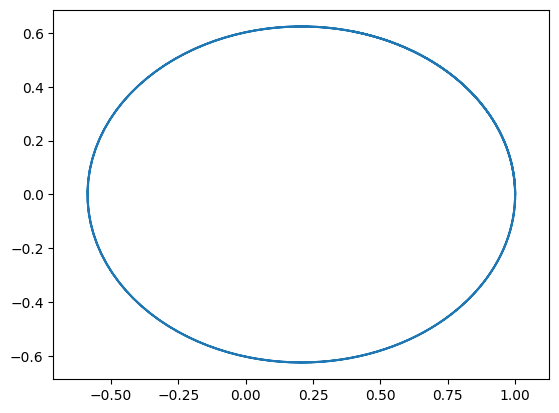

In [43]:
plt.plot(rs[:,0],rs[:,1])
plt.axis('equal')

In [47]:
fig = pc.plot_doscuerpos_3d(rs,vs,tipo='plotly')


Paquete pymcel cargado. Versión: 0.5.8


In [3]:
import numpy as np

In [141]:
m0 = 1
m1 = 0.3
m2 = 0.001

m01 = m0 + m1
m012 = m2 + m01

In [164]:
r01 = [0.01,0,0]
v01 = [0,10,0.0]

ts = np.linspace(0,0.01,20)
rs01,vs01 = pc.doscuerpos_solucion(m01,r01,v01,ts)
#fig = pc.plot_doscuerpos_3d(rs01,vs01,ts=ts,tipo='matplotlib')
fig = pc.plot_doscuerpos_3d(rs01,vs01,ts=ts,tipo='plotly')

(200, 3)


In [151]:
len(rs01)

20

In [152]:
from scipy.interpolate import interp1d

In [153]:
xfun = interp1d(ts,rs01[:,0],kind='cubic')

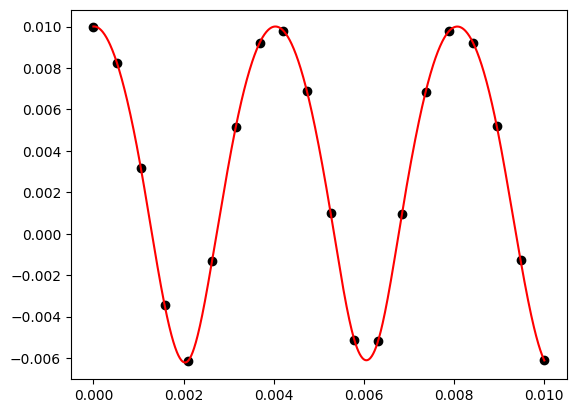

In [154]:
imax = -1
tss = np.linspace(ts[0],ts[imax],1000)
plt.plot(ts,rs01[:,0],'ko')
plt.plot(tss,xfun(tss),'r-')

In [79]:
rs01[1,0]

-0.003466306020243996

In [70]:
len(rs01)

20

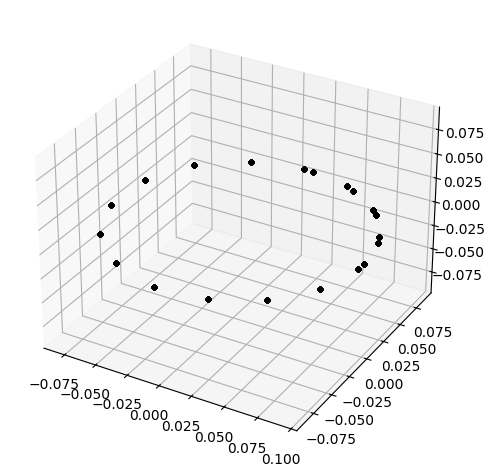

In [31]:
r012 = [0.1,0,0]
v012 = [0,3.5,0.0]

rs012,vs012 = pc.doscuerpos_solucion(m012,r012,v012,ts)
fig = pc.plot_doscuerpos_3d(rs012,vs012,marker='.',lw=0)

In [3]:
from ipywidgets import interact

In [20]:
@interact(e=(0.0,1.0,0.1),continuous_update=False)
def interactiva(e=0.0):
    pc.plot_elipse(e)

interactive(children=(FloatSlider(value=0.0, description='e', max=1.0), Output()), _dom_classes=('widget-inter…

In [21]:
@interact(e=(1.00,10.0,0.1))
def interactiva(e=1.3):
    pc.plot_hiperbola(e)

interactive(children=(FloatSlider(value=1.3, description='e', max=10.0, min=1.0), Output()), _dom_classes=('wi…

## Ejemplos para el README

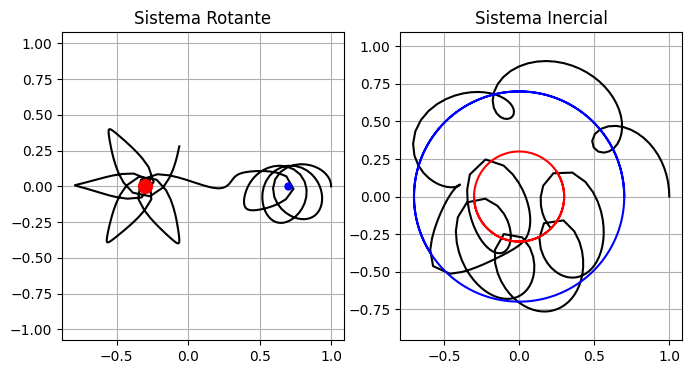

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Integraciòn
alfa=0.3
ts=np.linspace(0,10,Nt)
ro=[1.0,0.0,0.0]
vo=[0.0,0.45,0.0]
rs_rot,vs_rot,rs_ine,vs_ine,r1_ine,r2_ine=pc.crtbp_solucion(alfa,ro,vo,ts)

# Gráfico
fig,axs=plt.subplots(1,2,figsize=(8,4))

# Sistema rotante
ax=axs[0]
ax.plot(rs_rot[:,0],rs_rot[:,1],'k-')
ax.plot([-alfa],[0],'ro',ms=10)
ax.plot([1-alfa],[0],'bo',ms=5)
ax.set_title("Sistema Rotante")
ax.grid()
ax.axis('equal')	

ax=axs[1]
ax.plot(rs_ine[:,0],rs_ine[:,1],'k-')
ax.plot(r1_ine[:,0],r1_ine[:,1],'r-')
ax.plot(r2_ine[:,0],r2_ine[:,1],'b-')
ax.set_title("Sistema Inercial")
ax.grid()
ax.axis('equal')

plt.show()